<a href="https://colab.research.google.com/github/MartinVIllesca/Ramos-Redes/blob/master/taller%20de%20proyecto/stanford-dogs-keras-vgg16(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!tar -xvf '/content/drive/My Drive/data_EL5003/images.tar'

Streaming output truncated to the last 5000 lines.
Images/n02109047-Great_Dane/n02109047_34162.jpg
Images/n02109047-Great_Dane/n02109047_34209.jpg
Images/n02109047-Great_Dane/n02109047_3643.jpg
Images/n02109047-Great_Dane/n02109047_4267.jpg
Images/n02109047-Great_Dane/n02109047_481.jpg
Images/n02109047-Great_Dane/n02109047_5618.jpg
Images/n02109047-Great_Dane/n02109047_5675.jpg
Images/n02109047-Great_Dane/n02109047_5822.jpg
Images/n02109047-Great_Dane/n02109047_5894.jpg
Images/n02109047-Great_Dane/n02109047_5936.jpg
Images/n02109047-Great_Dane/n02109047_6008.jpg
Images/n02109047-Great_Dane/n02109047_6265.jpg
Images/n02109047-Great_Dane/n02109047_6276.jpg
Images/n02109047-Great_Dane/n02109047_6447.jpg
Images/n02109047-Great_Dane/n02109047_6680.jpg
Images/n02109047-Great_Dane/n02109047_7072.jpg
Images/n02109047-Great_Dane/n02109047_7156.jpg
Images/n02109047-Great_Dane/n02109047_7227.jpg
Images/n02109047-Great_Dane/n02109047_744.jpg
Images/n02109047-Great_Dane/n02109047_8090.jpg
Images/n0

In [3]:
#-------Import Dependencies-------#
%matplotlib inline
import pandas as pd
import os,shutil,math,scipy,cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rn


from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve,auc

from PIL import Image
from PIL import Image as pil_image
from PIL import ImageDraw

from time import time
from glob import glob
from tqdm import tqdm
from skimage.io import imread
from IPython.display import SVG

from scipy import misc,ndimage
from scipy.ndimage.interpolation import zoom
# hay problemas con esta libreria
# from scipy.ndimage import imread

import keras
from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.preprocessing.image import save_img
from keras.utils.vis_utils import model_to_dot
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.xception import Xception
from keras.applications.nasnet import NASNetMobile
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

Using TensorFlow backend.


In [0]:
from os import listdir, path

In [0]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [0]:
def label_assignment(img,label):
    return label

def training_data(label,data_dir):
  x = []
  y = []
  for img in tqdm(os.listdir(data_dir)):
      label = label_assignment(img,label)
      path = os.path.join(data_dir,img)
      img = cv2.imread(path,cv2.IMREAD_COLOR)
      img = cv2.resize(img,(imgsize,imgsize))
      img = (np.array(img) / 255).astype('float32')
      x.append(np.array(img))
      y.append(str(label))

  return np.array(x), y

In [0]:
def read_data(n):
  F = []
  Y = []

  for idx, f in enumerate(listdir('./Images')):
    if idx == n: break
    y_ = f[10:]
    print('\r',y_)
    F.append(f)
    Y.append(y_)

  return Y, F

In [0]:
X = []
Z = []
Y = []
imgsize = 150
n_classes = 100

In [9]:
labels, files = read_data(n_classes)
n_classes = len(files)
for n in range(n_classes):
  x, y_ = training_data(labels[n], path.join('./Images/', files[n]))
  y = np.ones((len(y_),))*n
  if n == 0:
    X = x
    Z = y_
    Y = y
  else:
    X = np.concatenate([X, x])
    Z = np.concatenate([Z, y_])
    Y = np.concatenate([Y, y])
X = np.array(X)
print(X.shape, Y.shape, Z.shape)

 11%|█         | 23/206 [00:00<00:00, 228.14it/s]

 Tibetan_terrier
 Italian_greyhound
 Norfolk_terrier
 Kerry_blue_terrier
 Doberman
 Siberian_husky
 Sealyham_terrier
 West_Highland_white_terrier
 dhole
 Weimaraner
 schipperke
 Appenzeller
 malinois
 redbone
 Irish_water_spaniel
 bull_mastiff
 Labrador_retriever
 Mexican_hairless
 golden_retriever
 whippet
 collie
 Border_collie
 Saint_Bernard
 miniature_schnauzer
 Bouvier_des_Flandres
 Border_terrier
 Pekinese
 Dandie_Dinmont
 Chesapeake_Bay_retriever
 wire-haired_fox_terrier
 beagle
 Lakeland_terrier
 kuvasz
 German_shepherd
 Samoyed
 groenendael
 Australian_terrier
 pug
 Ibizan_hound
 miniature_poodle
 affenpinscher
 Newfoundland
 Gordon_setter
 malamute
 Bedlington_terrier
 English_foxhound
 Sussex_spaniel
 curly-coated_retriever
 EntleBucher
 American_Staffordshire_terrier
 cocker_spaniel
 cairn
 silky_terrier
 Cardigan
 Rhodesian_ridgeback
 basset
 Welsh_springer_spaniel
 Irish_wolfhound
 Boston_bull
 black-and-tan_coonhound
 dingo
 Great_Dane
 Afghan_hound
 Maltese_dog
 basenji

100%|██████████| 169/169 [00:00<00:00, 260.78it/s]


(17186, 150, 150, 3) (17186,) (17186,)


In [0]:
# label_encoder= LabelEncoder()
# Y = label_encoder.fit_transform(Z)
# Y = to_categorical(Y,n_classes)
Y = Y.astype(int)
# X = np.array(X)
# X=X/255

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.33)

In [0]:
print(X_train.shape, X_val.shape)

(11514, 150, 150, 3) (5672, 150, 150, 3)


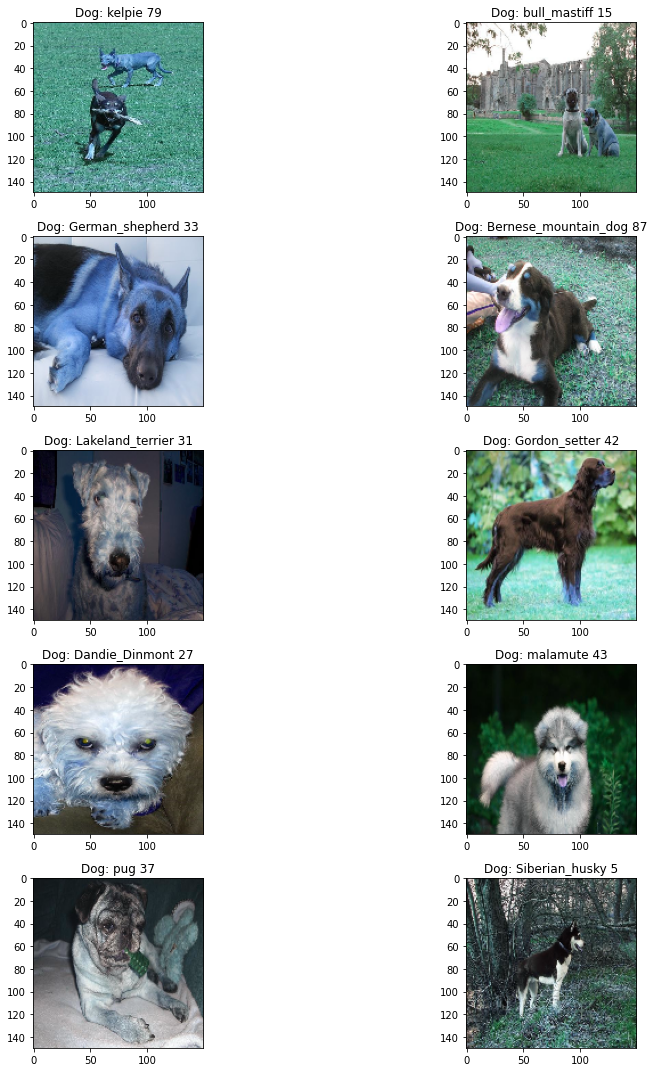

In [0]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(X) - 1)
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Dog: '+Z[l] + ' ' + str(Y[l]))
        
plt.tight_layout()

<keras.engine.input_layer.InputLayer object at 0x7f06c7a52b38> False
<keras.layers.convolutional.Conv2D object at 0x7f06ca00eb38> False
<keras.layers.convolutional.Conv2D object at 0x7f06caae5fd0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f06caaeb1d0> False
<keras.layers.convolutional.Conv2D object at 0x7f06c7eeb898> False
<keras.layers.convolutional.Conv2D object at 0x7f06c7a3a400> False
<keras.layers.pooling.MaxPooling2D object at 0x7f06c7a4b898> False
<keras.layers.convolutional.Conv2D object at 0x7f06c7a4b278> False
<keras.layers.convolutional.Conv2D object at 0x7f06c7a4bf60> False
<keras.layers.convolutional.Conv2D object at 0x7f06c5a14b00> False
<keras.layers.pooling.MaxPooling2D object at 0x7f06c5a19588> False
<keras.layers.convolutional.Conv2D object at 0x7f06c5a193c8> False
<keras.layers.convolutional.Conv2D object at 0x7f06c5a19fd0> False
<keras.layers.convolutional.Conv2D object at 0x7f06c5a1cc50> False
<keras.layers.pooling.MaxPooling2D object at 0x7f06c5a206d8>

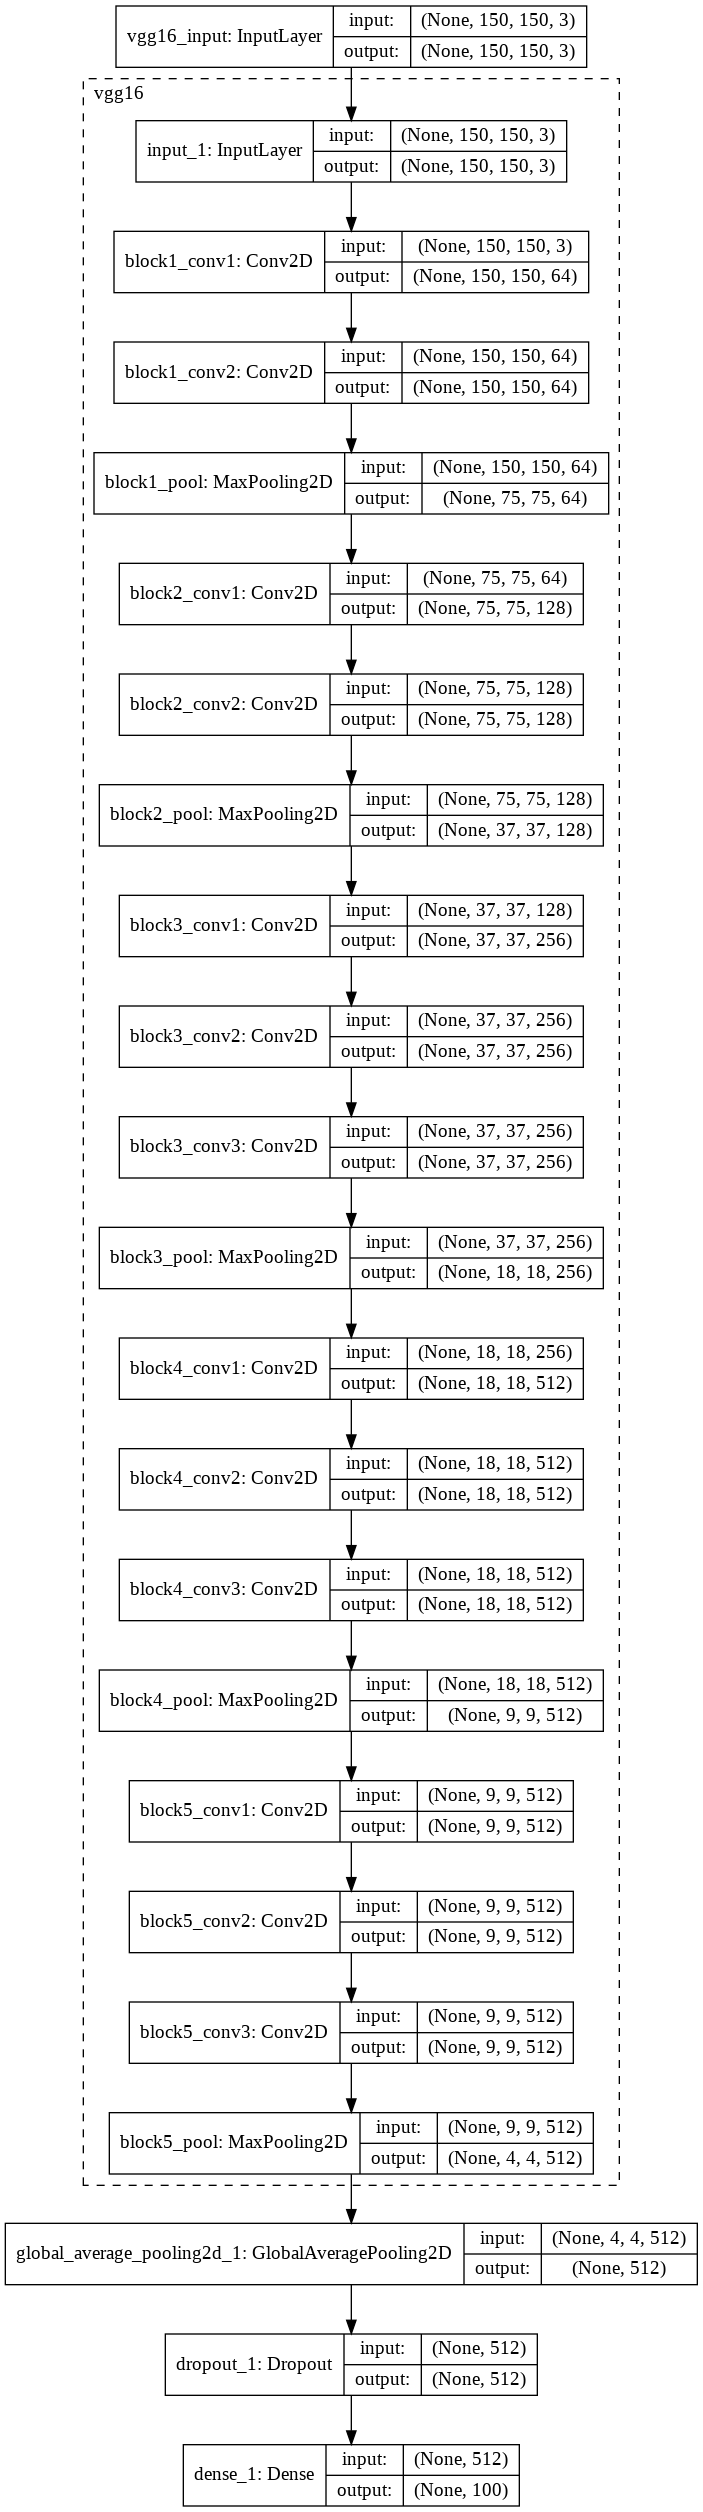

In [0]:
base_model = VGG16(include_top=False,
                  input_shape = (150,150,3),
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    
for layer in base_model.layers:
    print(layer,layer.trainable)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(n_classes,activation='softmax'))
model.summary()

SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True)

In [0]:
#-----------Optimizers-----------#
opt = SGD(lr=1e-4,momentum=0.99)
opt1 = Adam(lr=1e-2)
#----------Compile---------------#
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='./drive/My Drive/data_EL5003/model1/model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./drive/My Drive/data_EL5003/model1/logs'),
]

In [0]:
model.fit(X_train, y_train,
          batch_size=32,
          epochs=50,
          validation_data=(X_val, y_val))

Train on 11514 samples, validate on 5672 samples
Epoch 1/50
11514/11514 [==============================] - 31s 3ms/step - loss: 4.3761 - accuracy: 0.0545 - val_loss: 4.0470 - val_accuracy: 0.1449
Epoch 2/50
11514/11514 [==============================] - 23s 2ms/step - loss: 3.8491 - accuracy: 0.1588 - val_loss: 3.7191 - val_accuracy: 0.1966
Epoch 3/50
11514/11514 [==============================] - 23s 2ms/step - loss: 3.5444 - accuracy: 0.2128 - val_loss: 3.4894 - val_accuracy: 0.2331
Epoch 4/50
11514/11514 [==============================] - 23s 2ms/step - loss: 3.3214 - accuracy: 0.2567 - val_loss: 3.3447 - val_accuracy: 0.2437
Epoch 5/50
11514/11514 [==============================] - 23s 2ms/step - loss: 3.1512 - accuracy: 0.2888 - val_loss: 3.2219 - val_accuracy: 0.2694
Epoch 6/50
11514/11514 [==============================] - 23s 2ms/step - loss: 3.0285 - accuracy: 0.3082 - val_loss: 3.1318 - val_accuracy: 0.2800
Epoch 7/50
11514/11514 [==============================] - 23s 2ms/ste

In [0]:
# show_final_history(history)
# model.load_weights('/content/drive/My Drive/data_EL5003/model/model.h5')
# model_score = model.evaluate(X,Y)
# print("Model Test Loss:",model_score[0])
# print("Model Test Accuracy:",model_score[1])
# model.predict(X)